In [1]:
import pandas as pd
import re
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import shap
import warnings
warnings.filterwarnings('ignore')

C:\Users\jos_m\AppData\Local\Temp\ipykernel_9888\2303868417.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('class_4_final_project_data.csv')
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178.0,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125.0,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028.0,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074.0,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053.0,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003.0,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198.0,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146.0,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038.0,47.3684,-122.031,2390,7570


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21543 non-null  float64
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode          70
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [7]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode          70
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [8]:
df.shape


(21613, 21)

In [21]:
dfd=df[df.duplicated(subset=['id'], keep=False)]
dfd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117.0,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117.0,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006.0,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006.0,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146.0,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045.0,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133.0,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133.0,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065.0,47.5184,-121.886,2850,6000


In [94]:
df['sqft_living15'].nunique()

777

In [65]:
df['id'].duplicated().sum()

177

In [66]:
df['price'].min()

75000.0

In [67]:
df['price'].max()

7700000.0

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

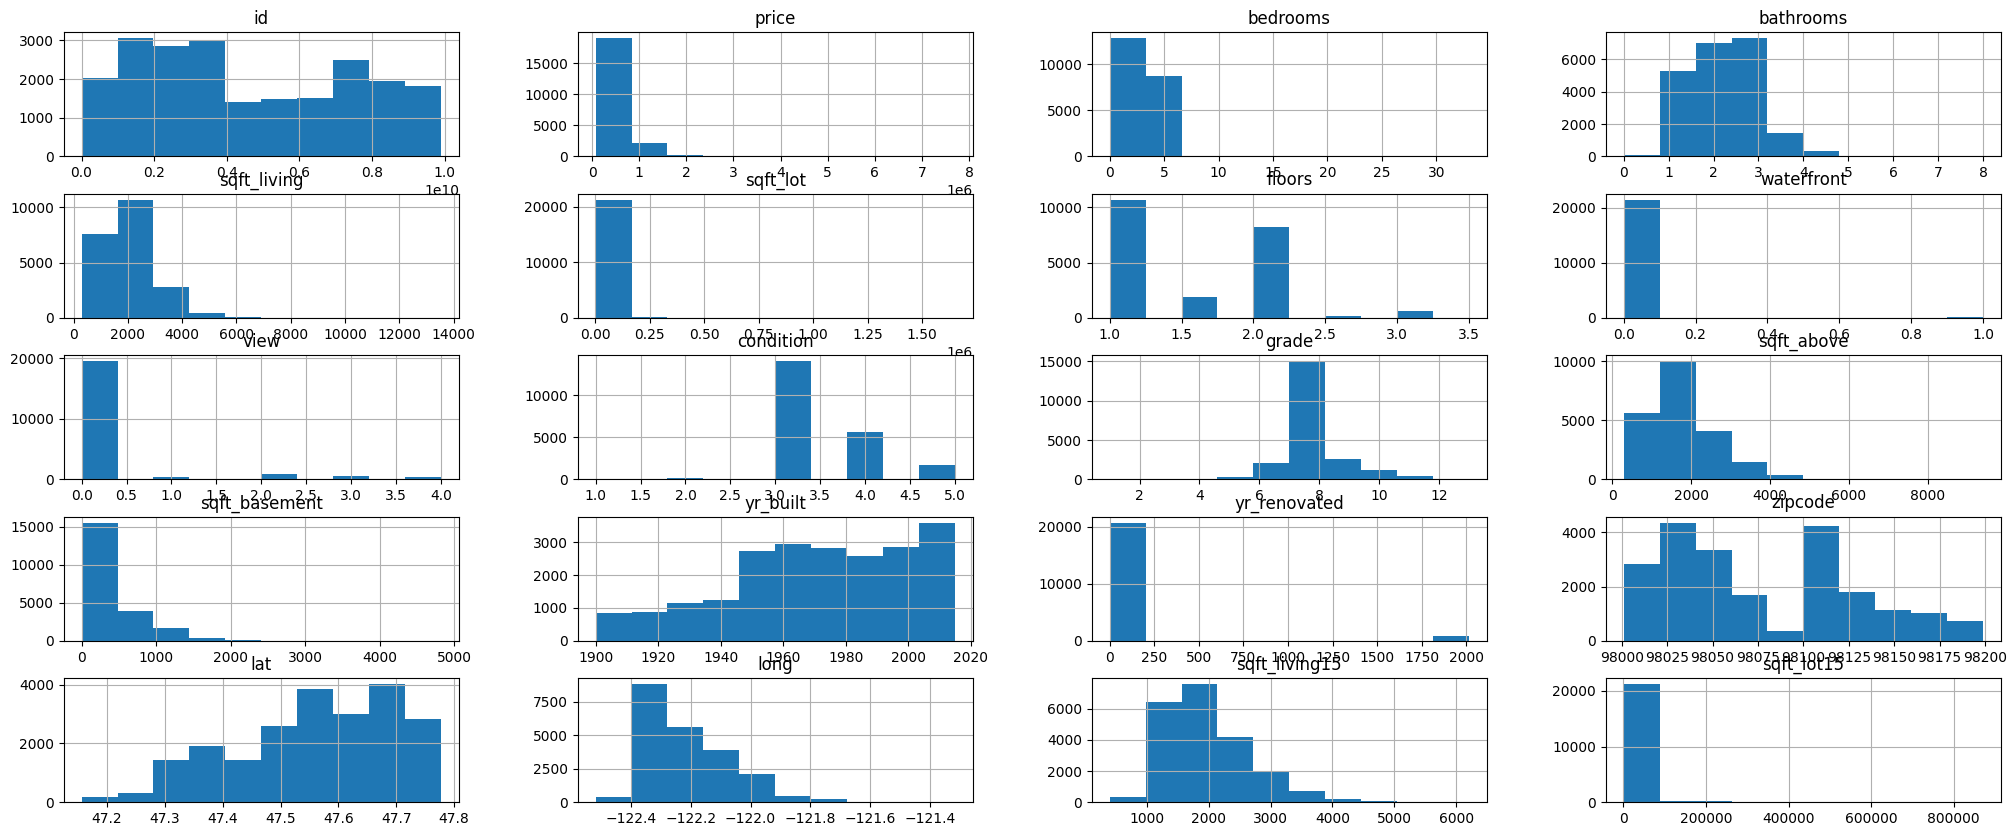

In [68]:
df.hist(figsize=(25,10))

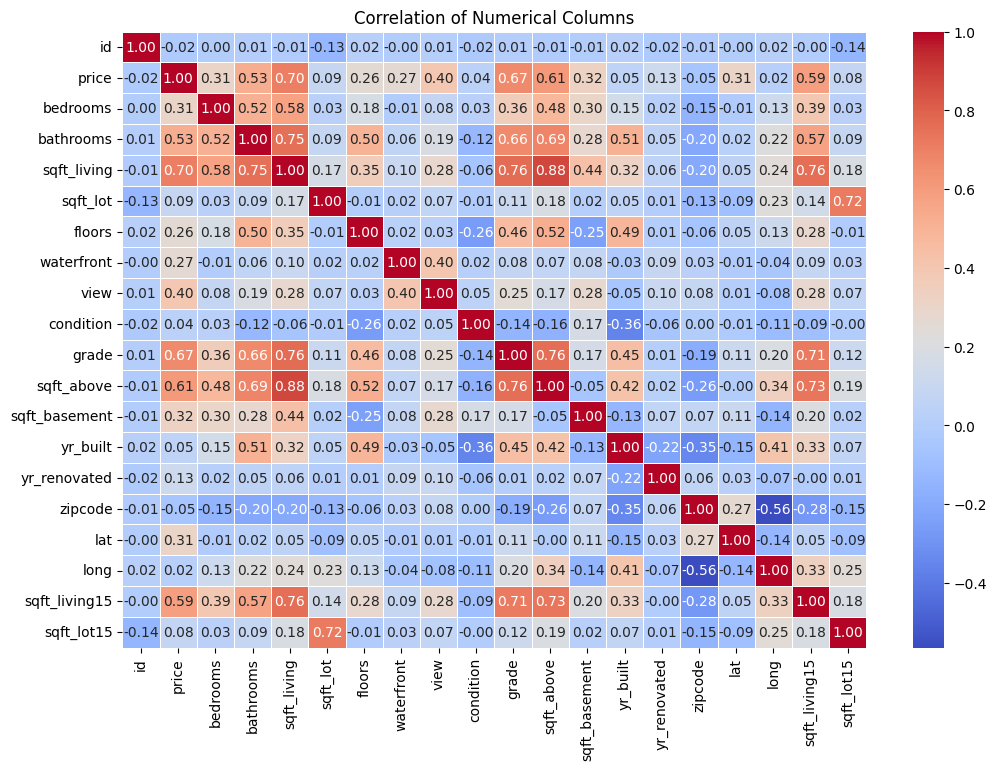

In [98]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns='date').corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Numerical Columns')
plt.show()

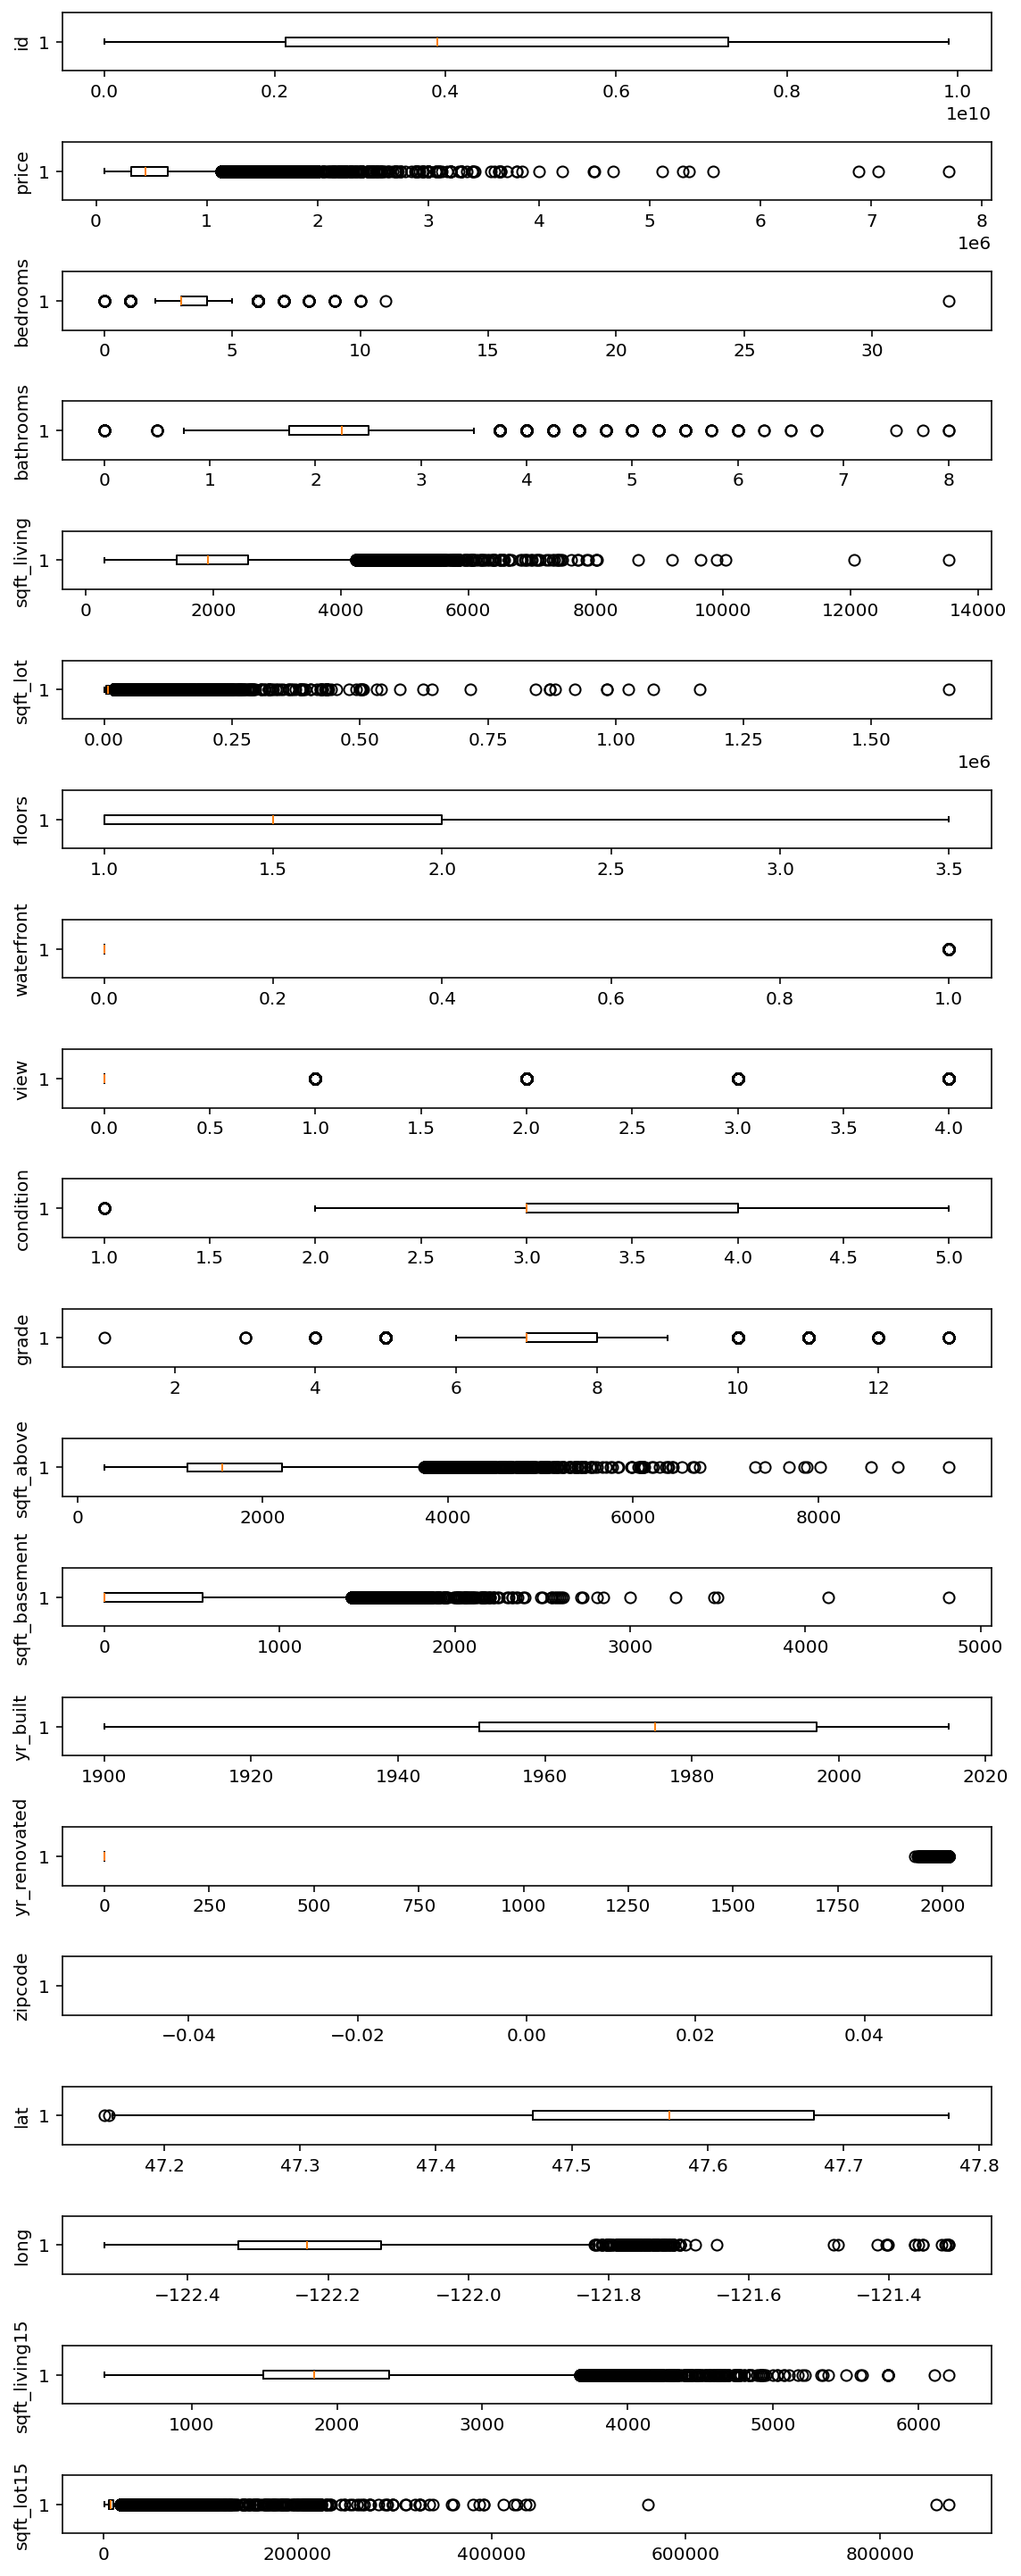

In [10]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(len(numeric_columns), 1, dpi=145, figsize=(8, 20))

for i, col in enumerate(numeric_columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [11]:

# Display the numerical column names
df[numeric_columns].corr()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008609,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053419,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.153033,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.204242,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199813,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129414,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059297,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030286,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084840,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003081,-0.014941,-0.106500,-0.092824,-0.003406


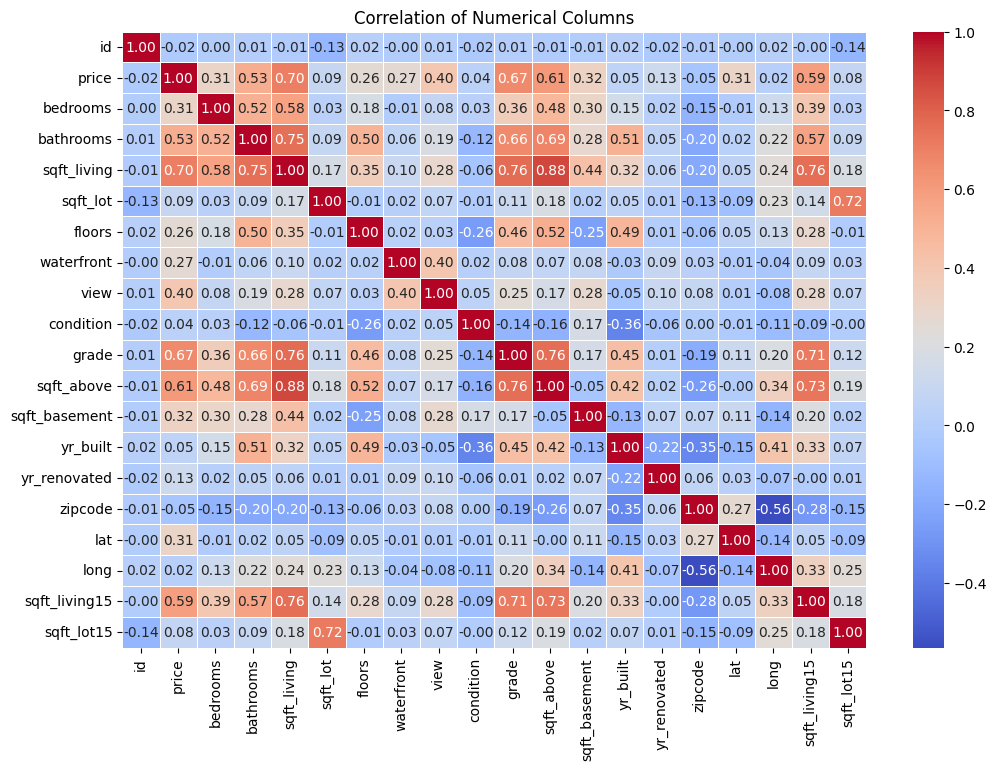

In [12]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Numerical Columns')
plt.show()

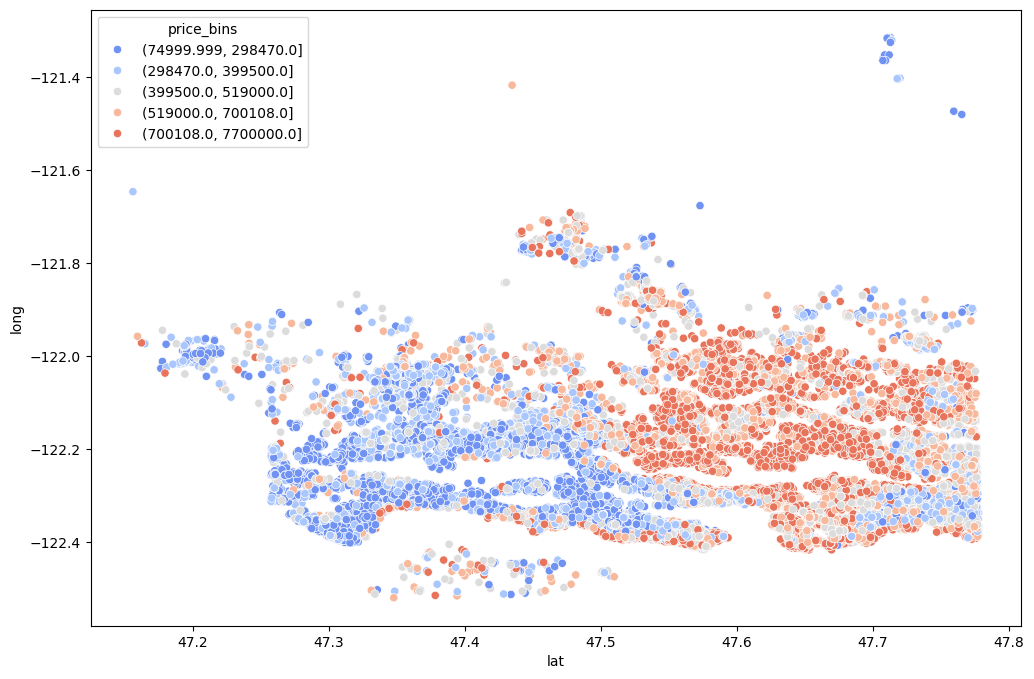

In [13]:
# Create price bins 
df['price_bins'] = pd.qcut(df['price'], q=5)  # Divide the price by 5 according to counts

# Crate scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lat', y='long', data=df, hue='price_bins', palette='coolwarm')
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

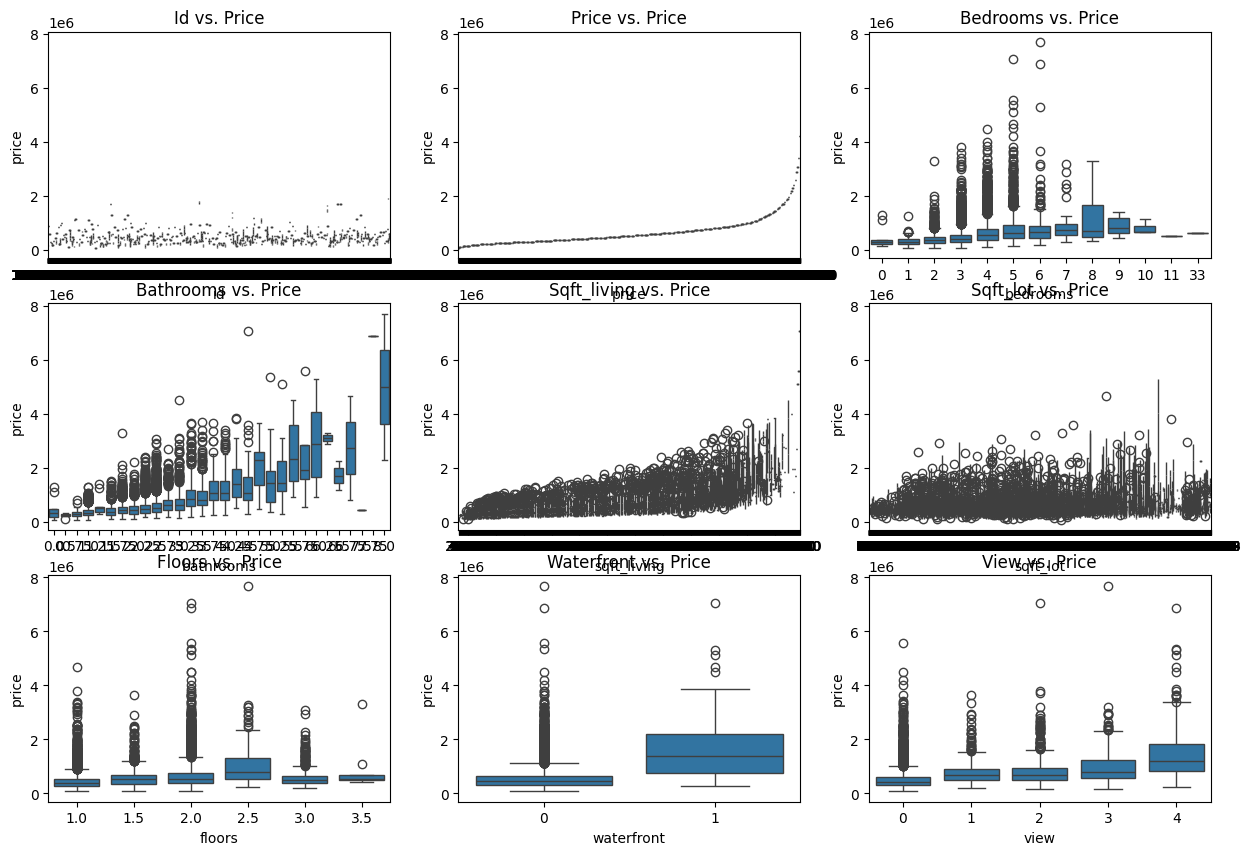

In [14]:
# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column], y=df['price'])
    plt.title(f'{column.capitalize()} vs. Price')

plt.tight_layout()
plt.show()


####  *****************************************

In [ ]:
columns_to_drop = ['date', 'id', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
df = df.drop(columns=columns_to_drop)


In [58]:
df=df.drop(columns=['price_bins'])

In [26]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df[numeric_columns]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178.0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125.0,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028.0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136.0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,98103.0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,98146.0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,98144.0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,98027.0,47.5345,-122.069


In [30]:
df.isnull().sum()
df=df.dropna()

In [31]:
df.isnull().sum()


price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
price_bins      0
dtype: int64

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Bağımsız ve bağımlı değişkenleri ayırma
X = df[numeric_columns].drop(columns=['price'])
y = df['price']

# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçeklendirme işlemi
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model eğitimi ve testi
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Logistic Regression": LogisticRegression(),
}

# Polynomial Regression için pipeline oluşturalım
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
models["Polynomial Regression"] = poly_model

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = model.score(X_test_scaled, y_test)
    print(f"{name}: RMSE = {rmse}, R2 Score = {r2}")


Linear Regression: RMSE = 220697.07314328017, R2 Score = 0.6738334872445694
SVR: RMSE = 395086.4244155036, R2 Score = -0.04527469642722726
Lasso Regression: RMSE = 220697.18393002177, R2 Score = 0.6738331597827347
Ridge Regression: RMSE = 220697.95384237813, R2 Score = 0.6738308840824827
Random Forest Regressor: RMSE = 129385.14763578693, R2 Score = 0.8878975576721433
Decision Tree Regressor: RMSE = 184496.82375334995, R2 Score = 0.772058180412854
Logistic Regression: RMSE = 242605.29960476866, R2 Score = 0.016245068461359945
Polynomial Regression: RMSE = 167268.99310933417, R2 Score = 0.8126399005135372


In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Bağımsız ve bağımlı değişkenleri ayırma
X = df_ysf.drop(columns=['price'])
y = df_ysf['price']

# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçeklendirme işlemi
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model eğitimi ve testi
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Logistic Regression": LogisticRegression(),
}

# Polynomial Regression için pipeline oluşturalım
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
models["Polynomial Regression"] = poly_model

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = model.score(X_test_scaled, y_test)
    print(f"{name}: RMSE = {rmse}, R2 Score = {r2}")

Linear Regression: RMSE = 279888.6806782094, R2 Score = 0.481813882559576
SVR: RMSE = 400767.51060390036, R2 Score = -0.06242949167167633
Lasso Regression: RMSE = 279888.72998406657, R2 Score = 0.48181369998975665
Ridge Regression: RMSE = 279889.05891168513, R2 Score = 0.48181248203513716
Random Forest Regressor: RMSE = 252534.3673630705, R2 Score = 0.5781519140916904
Decision Tree Regressor: RMSE = 268947.21138932096, R2 Score = 0.521536078974945
Logistic Regression: RMSE = 277317.758698061, R2 Score = 0.00994679620633819
Polynomial Regression: RMSE = 254693.70221084775, R2 Score = 0.5709069143159258


#Eski veriler
Linear Regression: RMSE = 259018.29694182263, R2 Score = 0.5562115543520207
SVR: RMSE = 400813.6523582296, R2 Score = -0.06267414814385508
Lasso Regression: RMSE = 259018.35126155987, R2 Score = 0.5562113682147898
Ridge Regression: RMSE = 259019.02033264018, R2 Score = 0.5562090755083359
Random Forest Regressor: RMSE = 257168.57310419326, R2 Score = 0.5625273628118128
Decision Tree Regressor: RMSE = 280814.95791567786, R2 Score = 0.4783783863800266
Logistic Regression: RMSE = 310580.0633854056, R2 Score = 0.010178117048346057
Polynomial Regression: RMSE = 235783.9623624413, R2 Score = 0.6322576666909114

In [59]:
import pandas as pd

# Assuming df is your DataFrame
columns_to_encode = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

# Perform one-hot encoding and drop original columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [60]:
df_encoded.head()

,price,sqft_living,sqft_lot,grade,yr_built,yr_renovated,zipcode,lat,long,bedrooms_1,...,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5
0,221900.0,1180,5650,7,1955,0,98178.0,47.5112,-122.257,False,...,False,False,False,False,False,False,False,True,False,False
1,538000.0,2570,7242,7,1951,1991,98125.0,47.7210,-122.319,False,...,False,False,False,False,False,False,False,True,False,False
2,180000.0,770,10000,6,1933,0,98028.0,47.7379,-122.233,False,...,False,False,False,False,False,False,False,True,False,False
3,604000.0,1960,5000,7,1965,0,98136.0,47.5208,-122.393,False,...,False,False,False,False,False,False,False,False,False,True
4,510000.0,1680,8080,8,1987,0,98074.0,47.6168,-122.045,False,...,False,False,False,False,False,False,False,True,False,False


In [52]:
print(df_encoded['price'].dtype)


float64


In [55]:
df_encoded

,price,sqft_living,sqft_lot,grade,yr_built,yr_renovated,zipcode,lat,long,price_bins,...,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5
0,221900.0,1180,5650,7,1955,0,98178.0,47.5112,-122.257,"(74999.999, 298470.0]",...,False,False,False,False,False,False,False,True,False,False
1,538000.0,2570,7242,7,1951,1991,98125.0,47.7210,-122.319,"(519000.0, 700108.0]",...,False,False,False,False,False,False,False,True,False,False
2,180000.0,770,10000,6,1933,0,98028.0,47.7379,-122.233,"(74999.999, 298470.0]",...,False,False,False,False,False,False,False,True,False,False
3,604000.0,1960,5000,7,1965,0,98136.0,47.5208,-122.393,"(519000.0, 700108.0]",...,False,False,False,False,False,False,False,False,False,True
4,510000.0,1680,8080,8,1987,0,98074.0,47.6168,-122.045,"(399500.0, 519000.0]",...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,8,2009,0,98103.0,47.6993,-122.346,"(298470.0, 399500.0]",...,False,False,False,False,False,False,False,True,False,False
21609,400000.0,2310,5813,8,2014,0,98146.0,47.5107,-122.362,"(399500.0, 519000.0]",...,False,False,False,False,False,False,False,True,False,False
21610,402101.0,1020,1350,7,2009,0,98144.0,47.5944,-122.299,"(399500.0, 519000.0]",...,False,False,False,False,False,False,False,True,False,False
21611,400000.0,1600,2388,8,2004,0,98027.0,47.5345,-122.069,"(399500.0, 519000.0]",...,False,False,False,False,False,False,False,True,False,False


# CLUSTERING

In [67]:
from sklearn.cluster import KMeans

# "price" sütununu veri setinden çıkar
X = df_encoded.drop(columns=['price'])

# K-Means modelini oluştur
kmeans = KMeans(n_clusters=5, random_state=42)  # n_clusters parametresini isteğe bağlı olarak ayarlayabilirsiniz

# Modeli veri setine uygula
clusters = kmeans.fit_predict(X)

# Oluşan küme etiketlerini DataFrame'e ekle
df_encoded['cluster'] = clusters

# Her bir kümenin kaç veri noktası içerdiğini say
cluster_counts_kmeans = df_encoded['cluster'].value_counts()

# Sonuçları göster
print("Küme Sayısı:", len(cluster_counts_kmeans))
print(cluster_counts_kmeans)


Küme Sayısı: 5
cluster
2    19904
0     1284
1      294
3       50
4       11
Name: count, dtype: int64


In [68]:
from sklearn.cluster import DBSCAN

# "price" sütununu veri setinden çıkar
X = df_encoded.drop(columns=['price'])

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps ve min_samples değerlerini veri setinize göre ayarlayabilirsiniz

# Modeli veri setine uygula
clusters = dbscan.fit_predict(X)

# Oluşan küme etiketlerini DataFrame'e ekle
df_encoded['cluster'] = clusters

# Her bir kümenin kaç veri noktası içerdiğini say
cluster_counts_dbscan = df_encoded['cluster'].value_counts()

# Sonuçları göster
print("Küme Sayısı:", len(cluster_counts_dbscan))
print(cluster_counts_dbscan)



Küme Sayısı: 1
cluster
-1    21543
Name: count, dtype: int64


In [69]:
from sklearn.cluster import AgglomerativeClustering

# "price" sütununu veri setinden çıkar
X = df_encoded.drop(columns=['price'])

# Hiyerarşik Kümeleme modelini oluştur
hc = AgglomerativeClustering(n_clusters=5)  # n_clusters parametresini isteğe bağlı olarak ayarlayabilirsiniz

# Modeli veri setine uygula
clusters = hc.fit_predict(X)

# Oluşan küme etiketlerini DataFrame'e ekle
df_encoded['cluster'] = clusters

# Her bir kümenin kaç veri noktası içerdiğini say
cluster_counts_agglomerative = df_encoded['cluster'].value_counts()

# Sonuçları göster
print("Küme Sayısı:", len(cluster_counts_agglomerative))
print(cluster_counts_agglomerative)


Küme Sayısı: 5
cluster
1    19887
0     1357
4      240
3       48
2       11
Name: count, dtype: int64


In [70]:
from sklearn.mixture import GaussianMixture

# "price" sütununu veri setinden çıkar
X = df_encoded.drop(columns=['price'])

# GMM modelini oluştur
gmm = GaussianMixture(n_components=5)  # n_components parametresini isteğe bağlı olarak ayarlayabilirsiniz

# Modeli veri setine uygula
clusters = gmm.fit_predict(X)

# Oluşan küme etiketlerini DataFrame'e ekle
df_encoded['cluster'] = clusters

# Her bir kümenin kaç veri noktası içerdiğini say
cluster_counts_gmm = df_encoded['cluster'].value_counts()

# Sonuçları göster
print("Küme Sayısı:", len(cluster_counts_gmm))
print(cluster_counts_gmm)


Küme Sayısı: 5
cluster
4    19348
1     1494
0      617
2       73
3       11
Name: count, dtype: int64


In [71]:
from sklearn.cluster import SpectralClustering

# "price" sütununu veri setinden çıkar
X = df_encoded.drop(columns=['price'])

# Spectral Clustering modelini oluştur
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)

# Modeli veri setine uygula
clusters = spectral_clustering.fit_predict(X)

# Oluşan küme etiketlerini DataFrame'e ekle
df_encoded['cluster'] = clusters

# Her bir kümenin kaç veri noktası içerdiğini say
cluster_counts_spectral = df_encoded['cluster'].value_counts()

# Sonuçları göster
print("Küme Sayısı:", len(cluster_counts_spectral))
print(cluster_counts_spectral)


Küme Sayısı: 5
cluster
0    12304
1     6587
2     1557
3      741
4      354
Name: count, dtype: int64


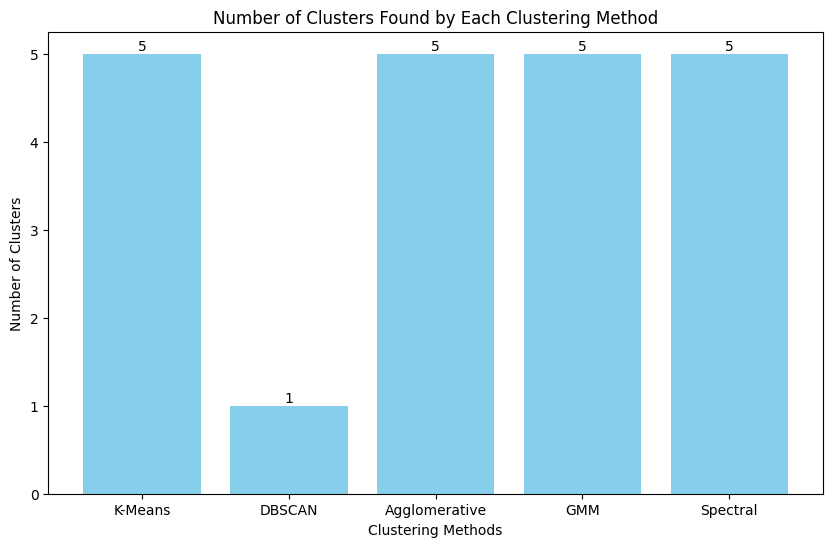

In [73]:
import matplotlib.pyplot as plt

# Kümeleme yöntemlerinin adları
methods = ['K-Means', 'DBSCAN', 'Agglomerative', 'GMM', 'Spectral']

# Her bir yöntemin bulduğu küme sayıları ve bu sayıların yazılacağı konumlar
cluster_counts = [len(cluster_counts_kmeans), len(cluster_counts_dbscan), len(cluster_counts_agglomerative), 
                  len(cluster_counts_gmm), len(cluster_counts_spectral)]
x_positions = range(len(methods))

# Küme sayılarını gösteren çubuk grafik
plt.figure(figsize=(10, 6))
bars = plt.bar(methods, cluster_counts, color='skyblue')

# Her bir çubuğun üzerine küme sayısını yazdırma
for bar, count in zip(bars, cluster_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.xlabel('Clustering Methods')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters Found by Each Clustering Method')
plt.show()



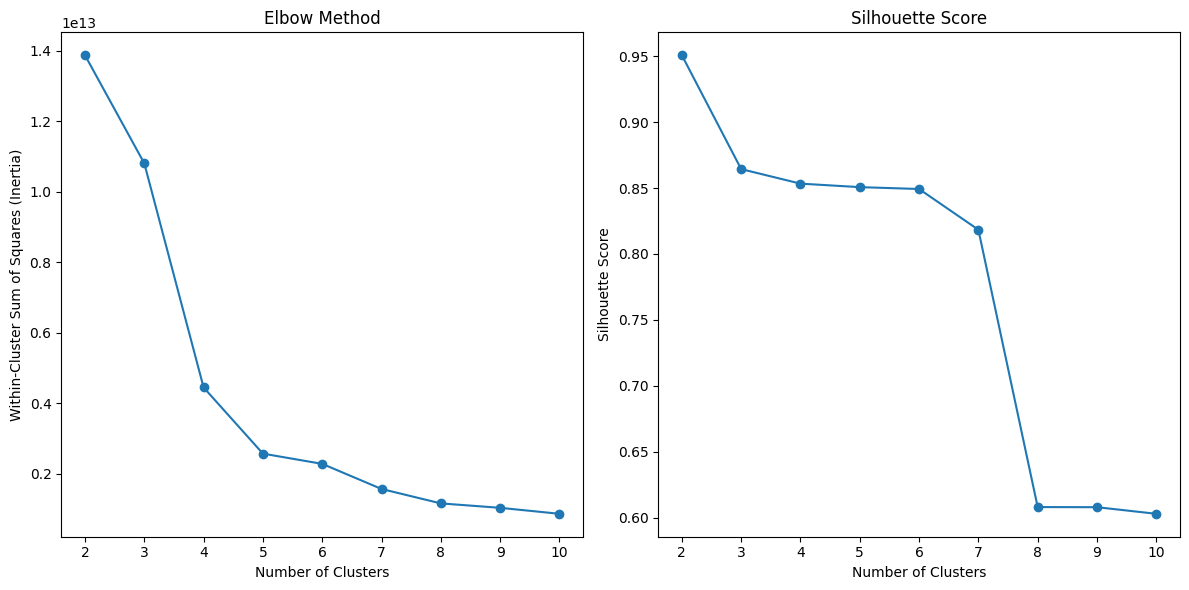

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette Skoru ve Elbow Method'unu birlikte kullan
def silhouette_elbow_method(data, max_clusters=10):
    inertias = []
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return inertias, silhouette_scores

# Veri seti
X = df_encoded.drop(columns=['price'])

# Silhouette Skoru ve Elbow Method'u birlikte kullan
inertias, silhouette_scores = silhouette_elbow_method(X)

# Elbow Method grafiği
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, len(inertias) + 2), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')

# Silhouette Skoru grafiği
plt.subplot(1, 2, 2)
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()


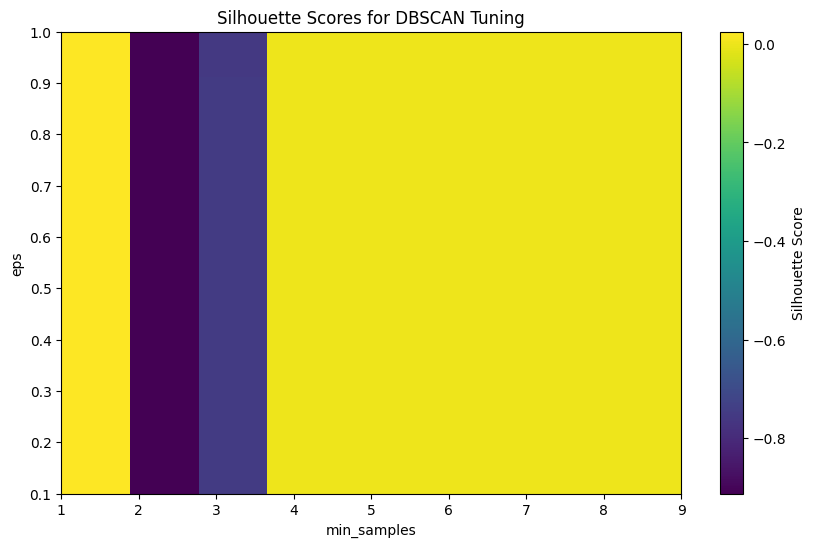

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Veri seti
X = df_encoded.drop(columns=['price'])

# DBSCAN tuning için parametre aralıkları
eps_values = np.linspace( 0.1, 1.0, 10)
min_samples_values = range(1, 10)

# Silhouette Skorları
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Tuning işlemi
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        if len(set(clusters)) > 1:
            silhouette_scores[i, j] = silhouette_score(X, clusters)

# Silhouette Skorları görselleştirme
plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, cmap='viridis', origin='lower', aspect='auto',
           extent=[min_samples_values[0], min_samples_values[-1], eps_values[0], eps_values[-1]])
plt.colorbar(label='Silhouette Score')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Silhouette Scores for DBSCAN Tuning')
plt.xticks(min_samples_values)
plt.yticks(eps_values)
plt.grid(False)
plt.show()


In [79]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178.0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125.0,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028.0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136.0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074.0,47.6168,-122.045


In [86]:
df_encoded['cluster'].nunique()


5

In [2]:
df = pd.read_csv('../cleaned_data_v2.csv')
df.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,nearest_station_distance_km,bathroom_category,density,commute_time,distance_to_point_km,is_near_shore,grade_living
0,221900.0,3,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,8620.002287,Studio or 1 Bathroom,5364.0,32.9,0.595763,False,8260
1,538000.0,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,2078.181042,2-3 Bathrooms,7999.0,28.9,3.038596,False,17990
2,180000.0,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,8109.552186,Studio or 1 Bathroom,3833.0,33.1,2.317669,False,4620
3,604000.0,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,8918.318639,2-3 Bathrooms,7517.0,30.6,0.101668,True,13720
4,510000.0,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,19789.800401,1-2 Bathrooms,2896.0,32.7,1.750656,False,13440
5,1225000.0,4,4.50,101930,1.0,0,0,3,2001,0,98053,47.6561,-122.005,22454.048889,+3 Bathrooms,827.0,32.5,5.628604,False,59620
6,257500.0,3,2.25,6819,2.0,0,0,3,1995,0,98003,47.3097,-122.327,29990.522232,2-3 Bathrooms,4392.0,32.4,3.594631,False,12005
7,291850.0,3,1.50,9711,1.0,0,0,3,1963,0,98198,47.4095,-122.315,18874.712231,1-2 Bathrooms,5039.0,30.1,1.308205,False,7420
8,229500.0,3,1.00,7470,1.0,0,0,3,1960,0,98146,47.5123,-122.337,7680.708951,Studio or 1 Bathroom,6034.0,29.8,3.390922,False,12460
9,323000.0,3,2.50,6560,2.0,0,0,3,2003,0,98038,47.3684,-122.031,31587.886352,2-3 Bathrooms,572.0,38.8,3.008387,False,13230


### ********************* ###

#CLUSTERING


In [50]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('cleaned_data_with_clusters.csv')


# Perform one-hot encoding on the 'bathroom_category' column
df_encoded = pd.get_dummies(df, columns=['bathroom_category'])

# Convert boolean columns to integer type (0 and 1)
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
df_encoded = df_encoded.drop(columns=['bathrooms'])
df_encoded = df_encoded.drop(columns=['cluster'])


# Verify the first few rows of the new dataframe to ensure the columns are in 0s and 1s
df_encoded.head()
df_encoded.to_csv('cleaned_data_with_clusters_2.csv', index=False)


,price,bedrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,...,nearest_station_distance_km,density,commute_time,distance_to_point_km,is_near_shore,grade_living,bathroom_category_+3 Bathrooms,bathroom_category_1-2 Bathrooms,bathroom_category_2-3 Bathrooms,bathroom_category_Studio or 1 Bathroom
0,221900.0,3,5650,1.0,0,0,3,1955,0,98178,...,8620.002287,5364.0,32.9,0.595763,0,8260,0,0,0,1
1,538000.0,3,7242,2.0,0,0,3,1951,1991,98125,...,2078.181042,7999.0,28.9,3.038596,0,17990,0,0,1,0
2,180000.0,2,10000,1.0,0,0,3,1933,0,98028,...,8109.552186,3833.0,33.1,2.317669,0,4620,0,0,0,1
3,604000.0,4,5000,1.0,0,0,5,1965,0,98136,...,8918.318639,7517.0,30.6,0.101668,1,13720,0,0,1,0
4,510000.0,3,8080,1.0,0,0,3,1987,0,98074,...,19789.800401,2896.0,32.7,1.750656,0,13440,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,1131,3.0,0,0,3,2009,0,98103,...,1372.516972,11391.0,27.1,1.708484,0,12240,0,0,1,0
21609,400000.0,4,5813,2.0,0,0,3,2014,0,98146,...,8505.181320,6034.0,29.8,1.990125,0,18480,0,0,1,0
21610,402101.0,2,1350,2.0,0,0,3,2009,0,98144,...,1942.180508,9389.0,29.3,0.886906,0,7140,0,0,0,1
21611,400000.0,3,2388,2.0,0,0,3,2004,0,98027,...,18943.445917,487.0,29.3,2.354171,0,12800,0,0,1,0


In [ ]:
df = pd.read_csv('cleaned_data_with_clusters_2.csv')
df

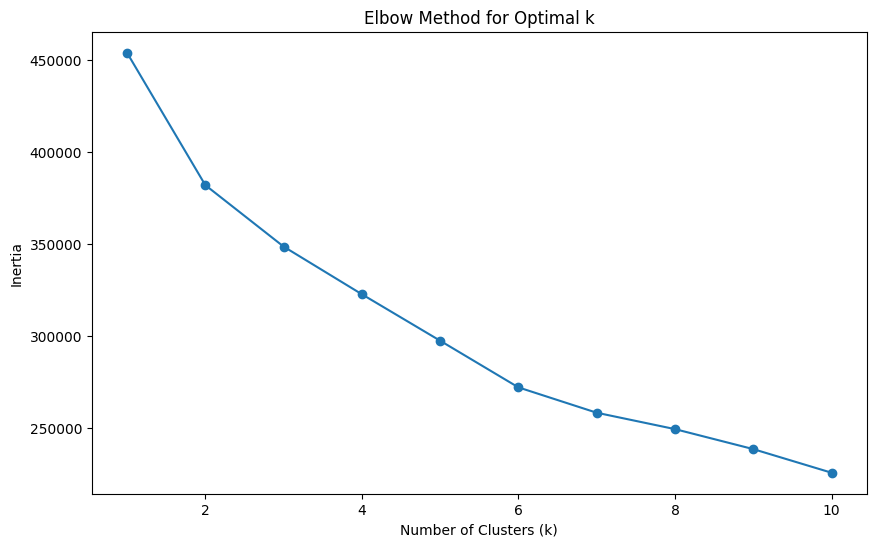

         bedrooms      sqft_lot    floors  waterfront      view  condition  \
cluster                                                                      
0        3.381279  24353.364629  1.534630         0.0  0.076815   3.330208   
1        3.660202   8706.942828  1.705253         0.0  0.326869   3.420808   
2        2.959422   7690.324625  1.203156         0.0  0.151969   3.519427   
3        4.257726  26062.737307  1.957506         0.0  0.627483   3.221854   
4        3.300613  25371.828221  1.641104         1.0  3.766871   3.533742   

            yr_built  yr_renovated       zipcode        lat  ...  \
cluster                                                      ...   
0        1985.327410     38.796138  98041.209598  47.448341  ...   
1        1978.349293    107.859192  98083.152121  47.630252  ...   
2        1948.039783     88.473677  98110.486938  47.612242  ...   
3        1990.819536    144.761038  98071.949227  47.593742  ...   
4        1962.190184    512.392638  98096.527

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Fiyat sütununu ayırma
X = df.drop(columns=['price'])
y = df['price']

# Sayısal sütunları seçme
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 5  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Küme başına ortalama değerleri gösterme
cluster_means = df.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Fiyat sütununu ayırma
X = df.drop(columns=['price'])
y = df['price']

# Sayısal sütunları seçme
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# DBSCAN uygulama
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps ve min_samples parametreleri verinize göre ayarlanmalıdır
clusters = dbscan.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Gürültülü verileri (-1 etiketli) hariç tutarak küme başına ortalama değerleri gösterme
cluster_means = df[df['cluster'] != -1].groupby('cluster')[numeric_columns].mean()
print(cluster_means)

# Gürültüleri hariç tutarak (cluster -1), silhouette skoru hesaplama
if len(set(clusters)) > 1:  # Tüm verilerin gürültü olup olmadığını kontrol etme
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette Score cannot be calculated as all points are considered noise.")

# Gürültüleri hariç tutarak (cluster -1), Calinski-Harabasz indeksi hesaplama
if len(set(clusters)) > 1:
    ch_index = calinski_harabasz_score(X_scaled, clusters)
    print(f'Calinski-Harabasz Index: {ch_index}')
else:
    print("Calinski-Harabasz Index cannot be calculated as all points are considered noise.")

# Gürültüleri hariç tutarak (cluster -1), Davies-Bouldin indeksi hesaplama
if len(set(clusters)) > 1:
    db_index = davies_bouldin_score(X_scaled, clusters)
    print(f'Davies-Bouldin Index: {db_index}')
else:
    print("Davies-Bouldin Index cannot be calculated as all points are considered noise.")




         bedrooms      sqft_lot  floors  waterfront  view  condition  \
cluster                                                                
0             3.0   7669.625000     1.0         0.0   0.0        3.0   
1             3.0  12033.575758     1.0         0.0   0.0        3.0   
2             3.0  11099.133333     1.0         0.0   0.0        3.0   
3             3.0   6263.048387     2.0         0.0   0.0        3.0   
4             2.0   5262.266667     1.0         0.0   0.0        4.0   
...           ...           ...     ...         ...   ...        ...   
533           4.0   5562.857143     2.0         0.0   0.0        3.0   
534           2.0   1237.500000     2.0         0.0   0.0        3.0   
535           2.0   1086.000000     3.0         0.0   0.0        3.0   
536           3.0   2725.400000     2.0         0.0   0.0        3.0   
537           4.0   6710.400000     2.0         0.0   0.0        3.0   

            yr_built  yr_renovated       zipcode        lat  ..

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Fiyat sütununu ayırma
X = df.drop(columns=['price'])
y = df['price']

# Sayısal sütunları seçme
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Spectral clustering uygulama
spectral = SpectralClustering(n_clusters=5, random_state=42)  # n_clusters parametresi veri setine göre ayarlanmalıdır
clusters = spectral.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Küme başına ortalama değerleri gösterme
cluster_means = df.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')


c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jos_m\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


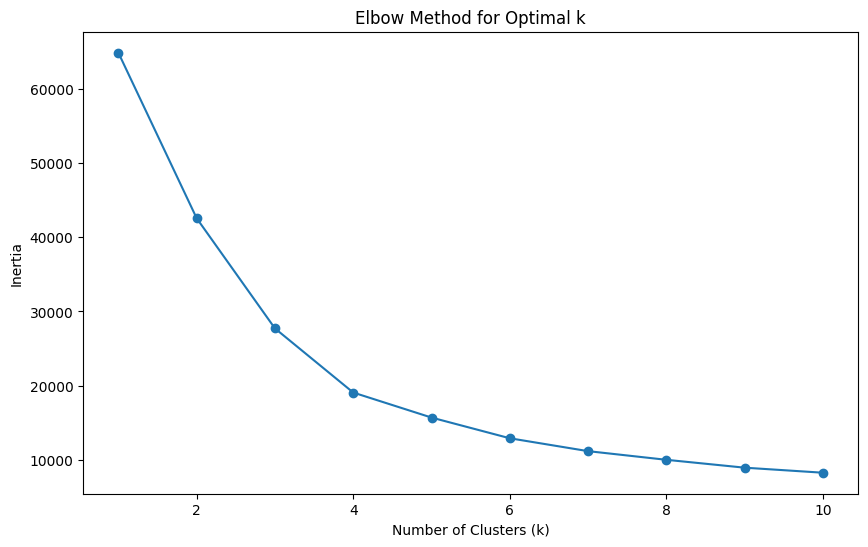

Silhouette Score: 0.41222876118145485
Calinski-Harabasz Index: 14470.53732298463
Davies-Bouldin Index: 0.8938832143552439


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'lat', 'is_near_shore']  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')


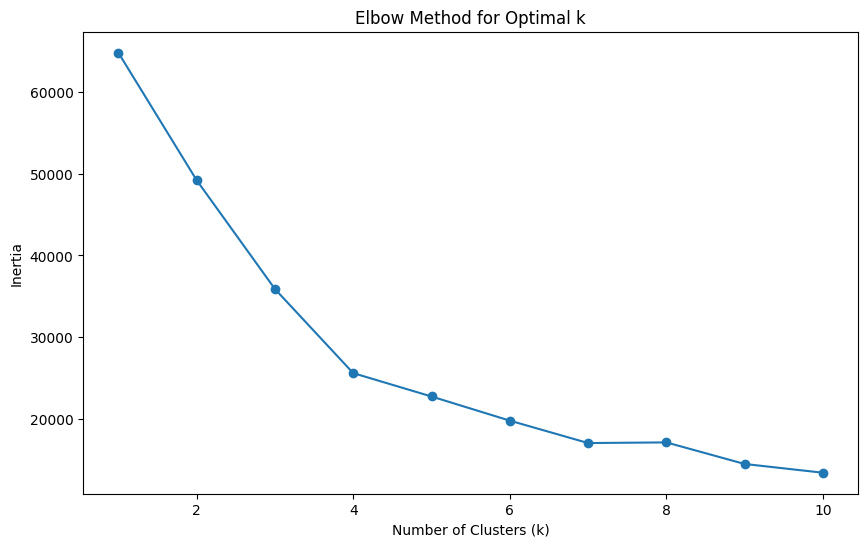

Silhouette Score: 0.3322896980958629
Calinski-Harabasz Index: 8714.903292299348
Davies-Bouldin Index: 1.0991207858462497


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'lat', 'distance_to_point_km']  
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

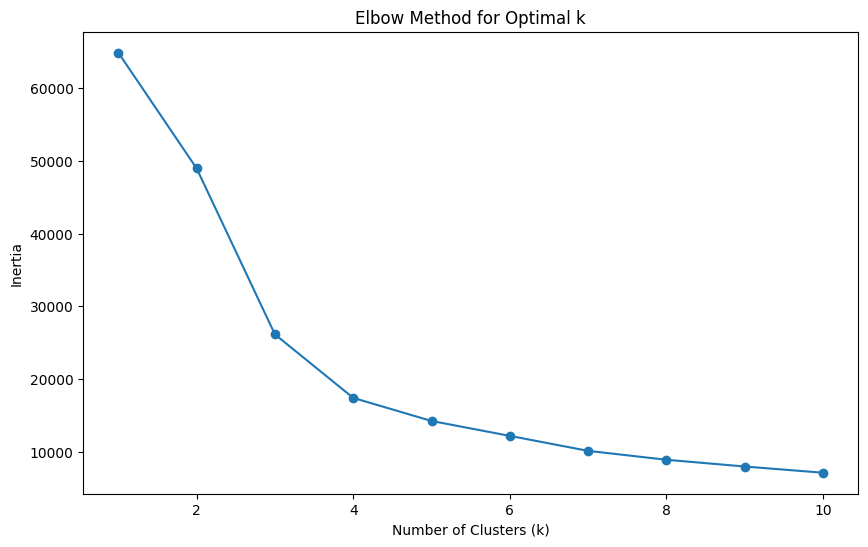

Silhouette Score: 0.5803448001637873
Calinski-Harabasz Index: 16000.585438547821
Davies-Bouldin Index: 0.8021558625028392


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'distance_to_point_km', 'is_near_shore']  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

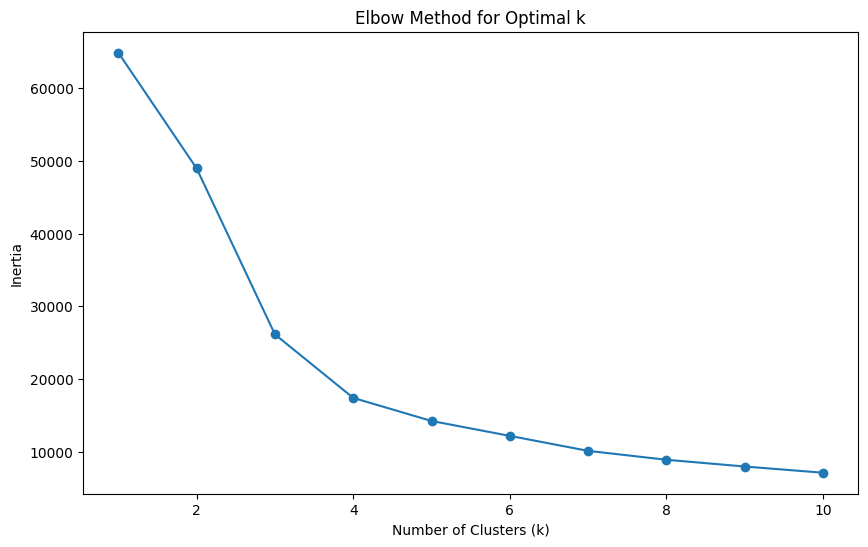

Silhouette Score: 0.5803448001637873
Calinski-Harabasz Index: 16000.585438547821
Davies-Bouldin Index: 0.8021558625028392


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'distance_to_point_km', 'is_near_shore']  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

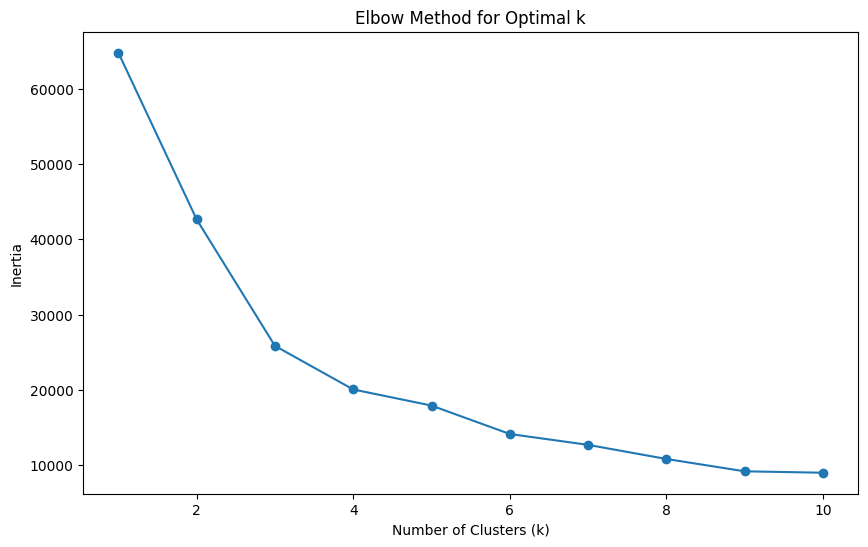

Silhouette Score: 0.4911852282264031
Calinski-Harabasz Index: 16321.292364907522
Davies-Bouldin Index: 0.7977420987490135


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'bedrooms', 'is_near_shore']  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

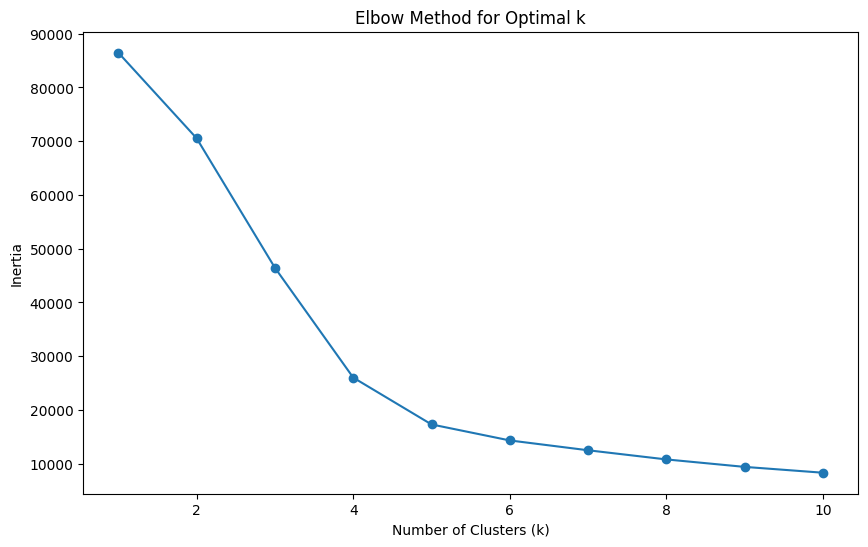

Silhouette Score: 0.5566879472176148
Calinski-Harabasz Index: 9309.8945875452
Davies-Bouldin Index: 0.8787676139684891


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'distance_to_point_km', 'is_near_shore', 'waterfront']  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

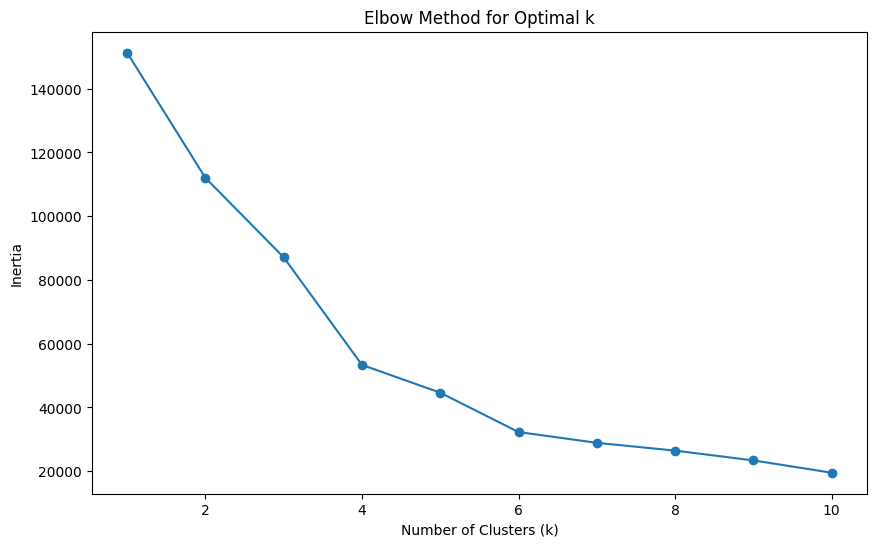

Silhouette Score: 0.3957674471608718
Calinski-Harabasz Index: 7961.852471848771
Davies-Bouldin Index: 1.0619727253719484


In [13]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'distance_to_point_km', 'is_near_shore','bathroom_category_+3 Bathrooms','bathroom_category_1-2 Bathrooms','bathroom_category_2-3 Bathrooms','bathroom_category_Studio or 1 Bathroom'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

In [12]:
df.columns

Index(['price', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'nearest_station_distance_km', 'density', 'commute_time',
       'distance_to_point_km', 'is_near_shore', 'grade_living',
       'bathroom_category_+3 Bathrooms', 'bathroom_category_1-2 Bathrooms',
       'bathroom_category_2-3 Bathrooms',
       'bathroom_category_Studio or 1 Bathroom'],
      dtype='object')

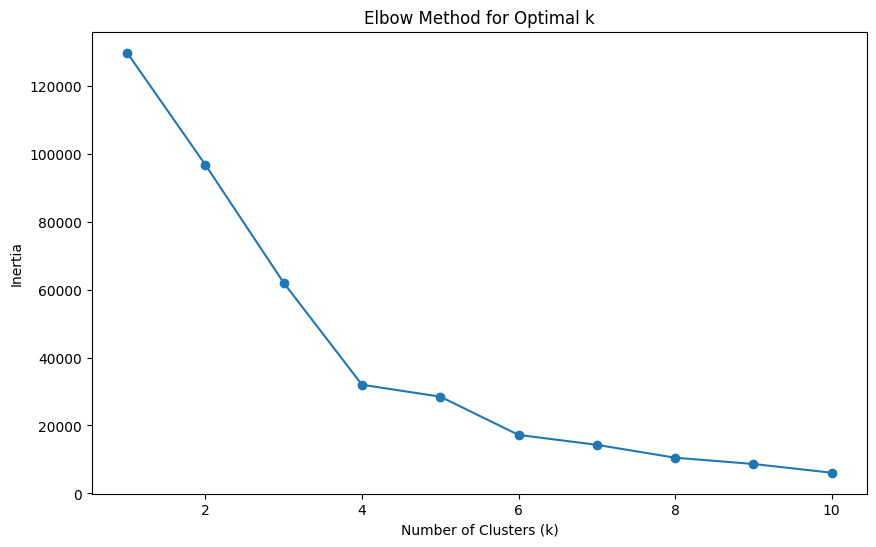

Silhouette Score: 0.5847750475416367
Calinski-Harabasz Index: 11800.329299313993
Davies-Bouldin Index: 0.7717457550663952


In [14]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'is_near_shore','bathroom_category_+3 Bathrooms','bathroom_category_1-2 Bathrooms','bathroom_category_2-3 Bathrooms','bathroom_category_Studio or 1 Bathroom'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

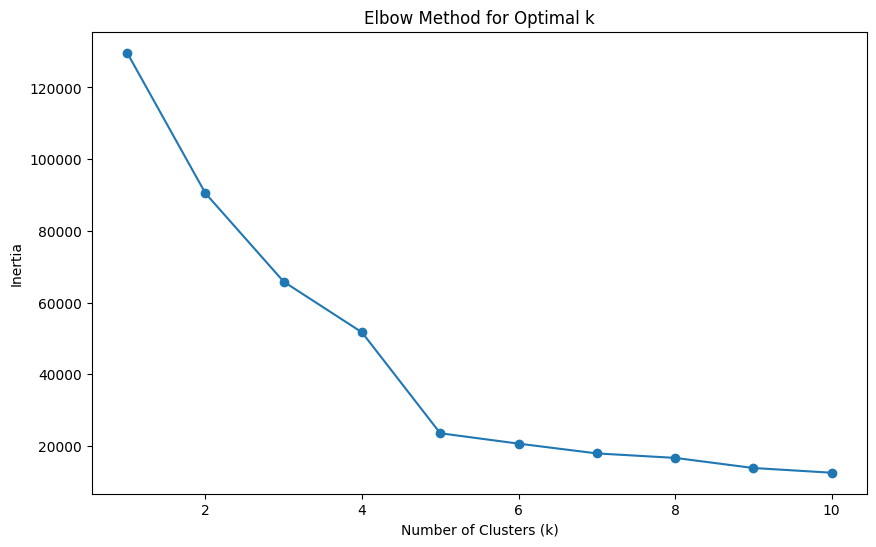

Silhouette Score: 0.45602194726850703
Calinski-Harabasz Index: 10484.49205721091
Davies-Bouldin Index: 0.8925052107608757


In [15]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'distance_to_point_km','bathroom_category_+3 Bathrooms','bathroom_category_1-2 Bathrooms','bathroom_category_2-3 Bathrooms','bathroom_category_Studio or 1 Bathroom'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

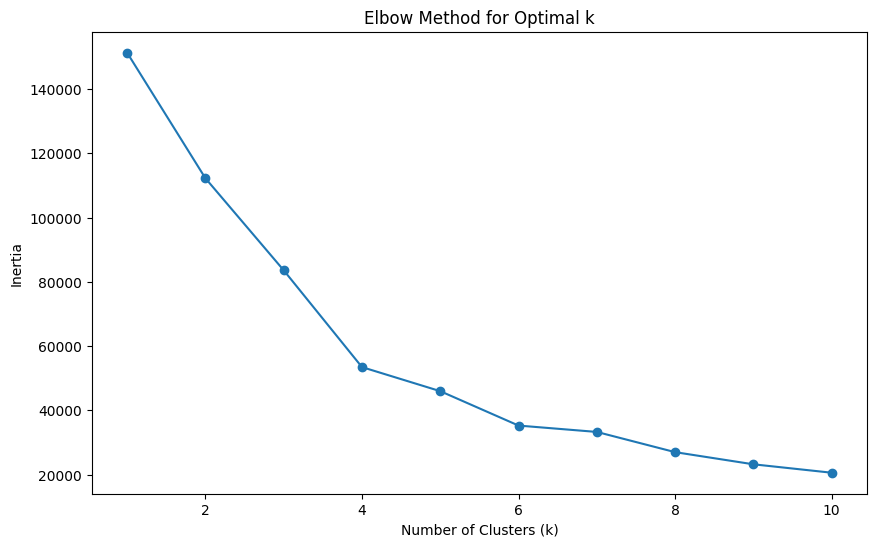

Silhouette Score: 0.43468742099924534
Calinski-Harabasz Index: 8749.952899634885
Davies-Bouldin Index: 1.0493604758892734


In [17]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'lat', 'is_near_shore','bathroom_category_+3 Bathrooms','bathroom_category_1-2 Bathrooms','bathroom_category_2-3 Bathrooms','bathroom_category_Studio or 1 Bathroom'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

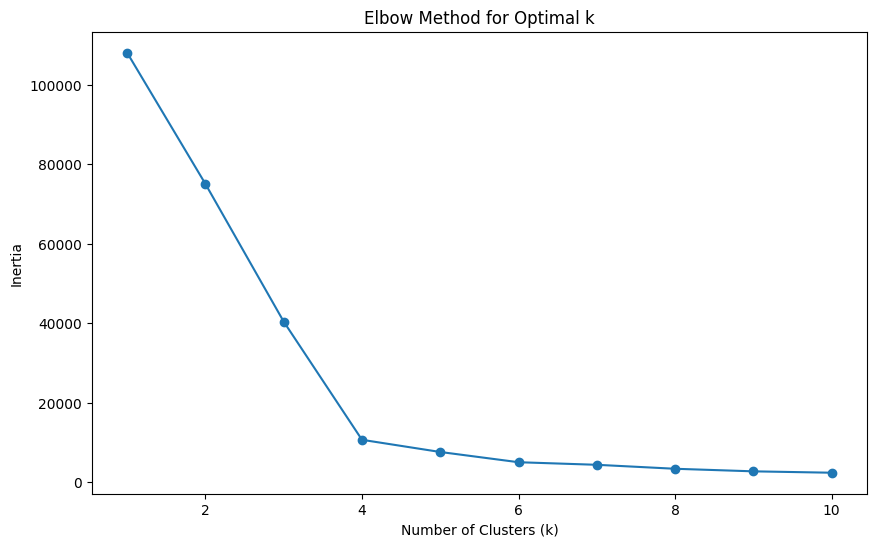

Silhouette Score: 0.6797972991078116
Calinski-Harabasz Index: 18070.793388744714
Davies-Bouldin Index: 0.5564091461167796


In [18]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'bathroom_category_+3 Bathrooms','bathroom_category_1-2 Bathrooms','bathroom_category_2-3 Bathrooms','bathroom_category_Studio or 1 Bathroom'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

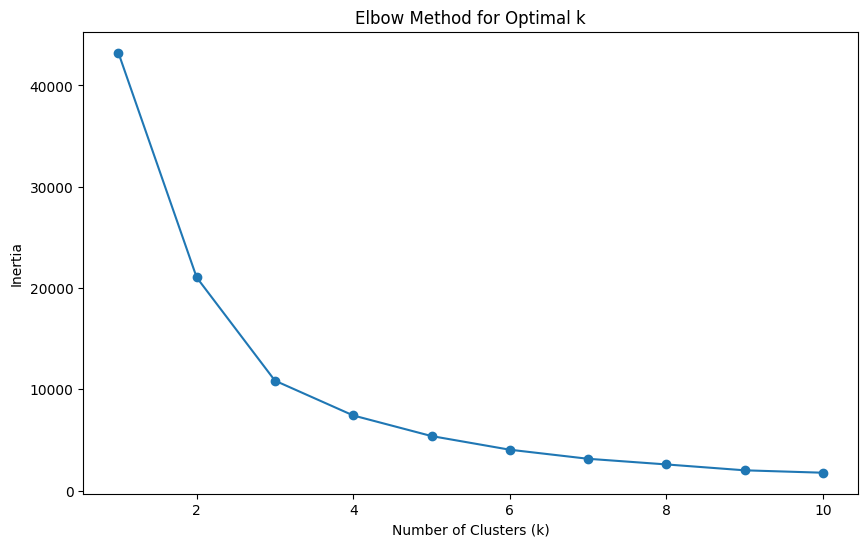

Silhouette Score: 0.6514319386658267
Calinski-Harabasz Index: 32233.049042818304
Davies-Bouldin Index: 0.5482537459873421


In [36]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'is_near_shore'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

In [37]:
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)


cluster
0    15470
2     3754
1     2389
Name: count, dtype: int64


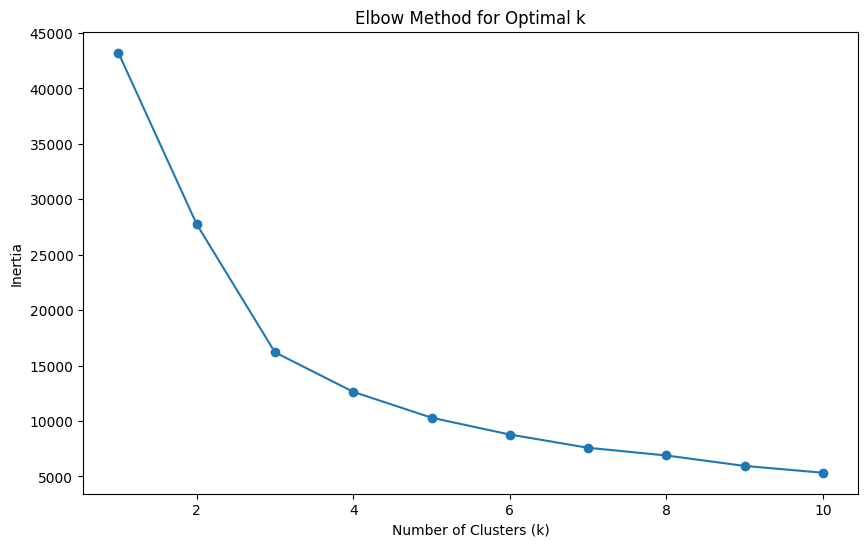

Silhouette Score: 0.531704132273034
Calinski-Harabasz Index: 18024.41451998423
Davies-Bouldin Index: 0.7662790376379341


In [20]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'distance_to_point_km'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

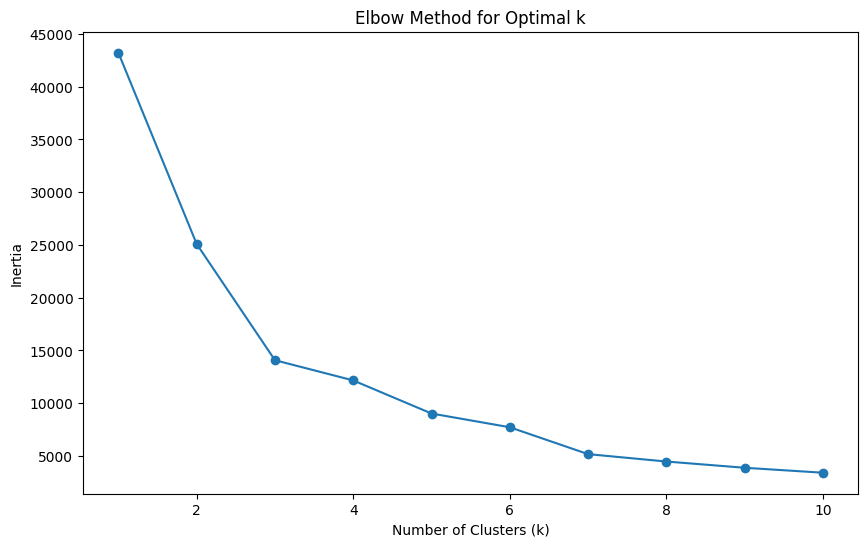

Silhouette Score: 0.5692768047676272
Calinski-Harabasz Index: 22380.746582885848
Davies-Bouldin Index: 0.643465413907987


In [21]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'condition'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

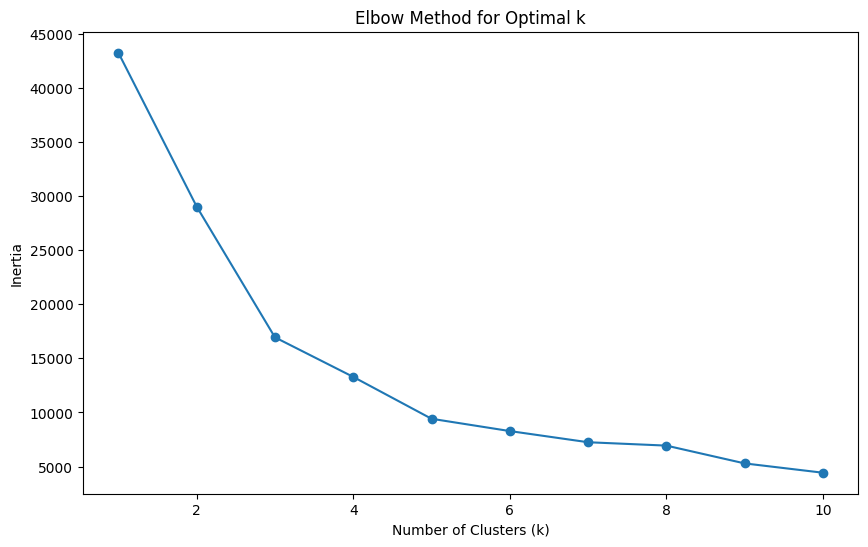

Silhouette Score: 0.6094476231020889
Calinski-Harabasz Index: 16770.681276116786
Davies-Bouldin Index: 0.6456899743465091


In [22]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'sqft_lot'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

In [35]:
a=df[df['yr_renovated']==0]
a.count()

price                                     20699
bedrooms                                  20699
sqft_lot                                  20699
floors                                    20699
waterfront                                20699
view                                      20699
condition                                 20699
yr_built                                  20699
yr_renovated                              20699
zipcode                                   20699
lat                                       20699
long                                      20699
nearest_station_distance_km               20699
density                                   20699
commute_time                              20699
distance_to_point_km                      20699
is_near_shore                             20699
grade_living                              20699
bathroom_category_+3 Bathrooms            20699
bathroom_category_1-2 Bathrooms           20699
bathroom_category_2-3 Bathrooms         

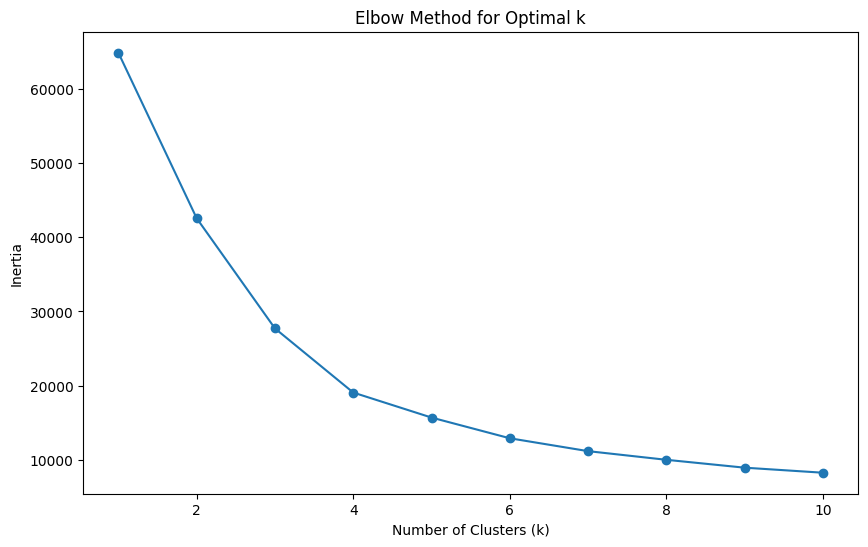

Silhouette Score: 0.41222876118145485
Calinski-Harabasz Index: 14470.53732298463
Davies-Bouldin Index: 0.8938832143552439


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Veriyi yükleme
df = pd.read_csv('cleaned_data_with_clusters_2.csv')

# Kullanılacak sütunları seçme
columns_to_use = ['grade_living', 'lat', 'is_near_shore'
]  #distance_to_point_km
X = df[columns_to_use]

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimum k değeri için Elbow Yöntemi
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K-means uygulama
optimal_k = 3  # Elbow grafiğine göre seçilecek k değeri
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekleme
df['cluster'] = clusters

# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calinski-Harabasz indeksi hesaplama
ch_index = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

# Davies-Bouldin indeksi hesaplama
db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')